Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder='../clustersearch/'
subfolder="2021_12_13_N4av"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="45989633"
njobs=80
basename="N4av"

name_ashape="ashape_%s"%basename
extremespars=[[1e-1,1e1],[1e-2,1e2],[1e-3,1e3],[1e-5,1e5],[1e-7,1e7]] #copy-paste from the boundary search
absder="True" #in this case it doesn´t matter because it is monotonically increasing


In [4]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,14 ok,15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 ok,23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 !!!not long enough 130 33.0 1629.0
30 ok,31 ok,32 ok,33 ok,34 ok,35 ok,36 ok,37 ok,38 ok,39 ok,40 ok,41 ok,42 ok,43 ok,44 ok,45 ok,46 ok,47 ok,48 ok,49 ok,50 ok,51 ok,52 ok,53 ok,54 ok,55 ok,56 ok,57 ok,58 ok,59 ok,60 ok,61 ok,62 ok,63 ok,64 ok,65 ok,66 ok,67 ok,68 ok,69 ok,70 ok,71 ok,72 ok,73 ok,74 ok,75 ok,76 ok,77 ok,78 ok,79 ok,80 ok,

There was 1 jobs that failed due to some random error in the cluster, but otherwise ok.

In [1]:
28%5.


3.0

In [5]:
checkf=os.path.join(datafolder, "2021_12_13_N4av/tocheck_N4av")
#tolerance 0.005
print(checkf)
command="wolframscript -file ../bin/N4av_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4av/tocheck_N4av
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4av/tocheck_N4av
mat_N4av_0.in
mat_N4av_0_checked2.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41,42,42,43,43,44,44,45,45,46,46,47,47,48,48,49,49,50,50,51,51,52,52,53,53,54,54,55,55,56,56,57,57,58,58,59,59,60,60,61,61,62,62,63,63,64,64,65,65,66,66,67,67,68,68,69,69,70,70,71,71,72,72,73,73,74,74,75,75,76,76,77,77,78,78,79,79,80,80,81,81,82,82,83,83,84,84,85,85,86,86,87,87,88,88,89,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,97,98,98,99,99,100,100,101,101,102,102,103,103,104,104,105,105,106,106,107,107,108,108,109,109,110,110,111,111,112,112,113,113,114,114,115,115,116,116,117,117,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,126,126,127,127,128,128,129,129,130,130,131,131,132,132,133,133,134,134,135,135,136,136,137,137,138,138,139,139,140,140,141,141,142,142,143,143,144,144,145,145,146,146,147,147,148,148,149,149,150,150,151,151,152,152,

In [5]:
#doublecheck that the newly calculated mathematica doublecheck is the same as the original doublechecking
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x and not "checked2" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
checkedfiles2=[x for x in os.listdir(checkf) if ".out" in x and "checked2" in x]

parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
             
              
    

limits of parameters:,0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;

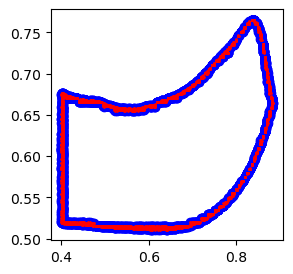

limits of parameters:,0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;

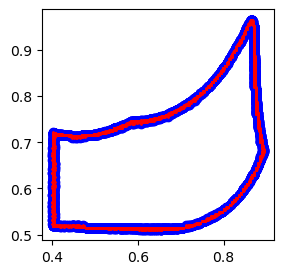

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

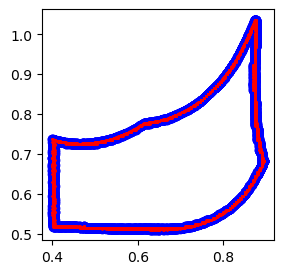

limits of parameters:,1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;1e-05 100000.0;

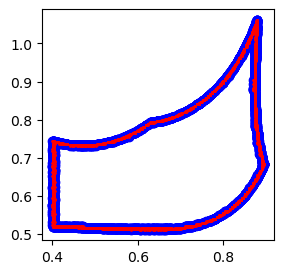

limits of parameters:,1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;

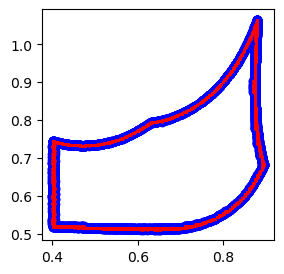

In [6]:
          
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(len(parlims_nums)):
    allpos=[]
    allrhos=[]
    allpos2=[]
    allrhos2=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
            
            data2=pd.read_csv(os.path.join(checkf,f.replace("checked","checked2")),sep=",|;",engine="python")
            pos2=data2["pos"].values
            stp2=data2["rho"].values
            allpos2.extend(pos2)
            allrhos2.extend(stp2)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos,color="b")
    ax.scatter(allpos2,allrhos2,s=1,color="r")
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [6]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

In [7]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4av/tocheck_N4av"
tol=0.005

results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
for i in range(len(parlims_nums)): 
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[]
    details_wrong=[]
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]: 
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)

looking at limits 0, [0.1, 10.0]
looking at limits 1, [0.01, 100.0]
looking at limits 2, [0.001, 1000.0]
looking at limits 3, [1e-05, 100000.0]
looking at limits 4, [1e-07, 10000000.0]


looking at limits 0, [0.1, 10.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[243 243 243 243 243 243 243 243 243 243 243 243 243 243 243 243]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


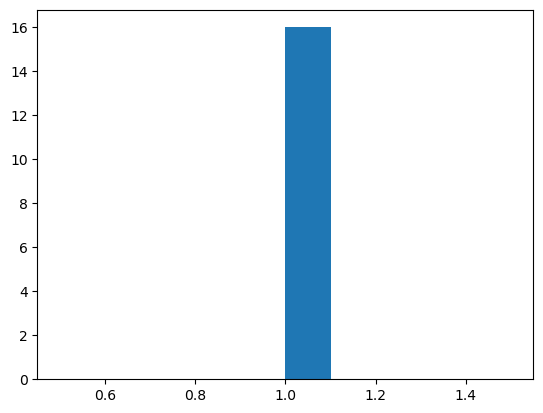

looking at limits 1, [0.01, 100.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[307 307 307 307 307 307 307 307 307 307 307 307 307 307 307 307]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


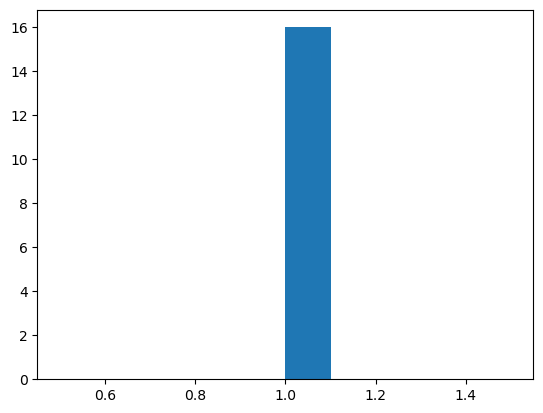

looking at limits 2, [0.001, 1000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[332 332 332 332 332 332 332 332 332 333 332 332 332 332 332 332]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


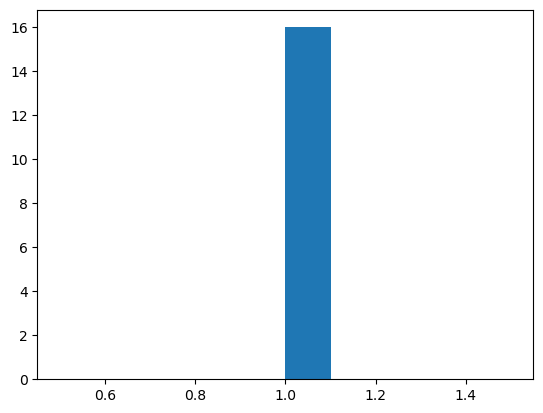

looking at limits 3, [1e-05, 100000.0]
15
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 15
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[338 338 338 338 338 338 338 338 338 338 338 338 338 338 338]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
15 jobs with [100, 101) % of coincident (same bin) points


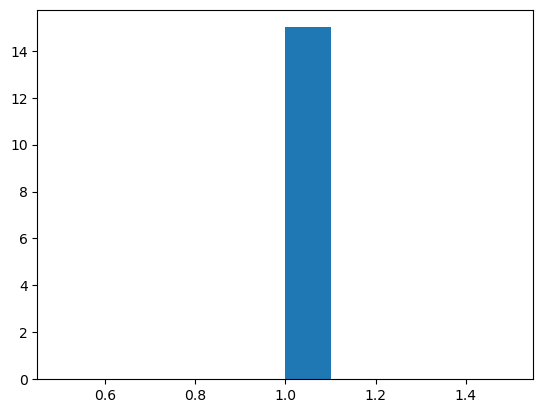

looking at limits 4, [1e-07, 10000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[339 339 339 339 339 339 339 339 339 339 339 339 339 339 339 339]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


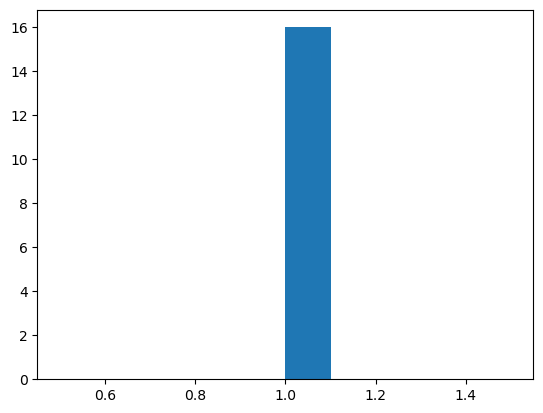

In [8]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])